## Import Librarries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf 
from tensorflow import keras 

import warnings
warnings.filterwarnings('ignore')

-------------------------------
## Read Data 

In [2]:
df = pd.read_csv("train.csv")

----------------
## Information About Data

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


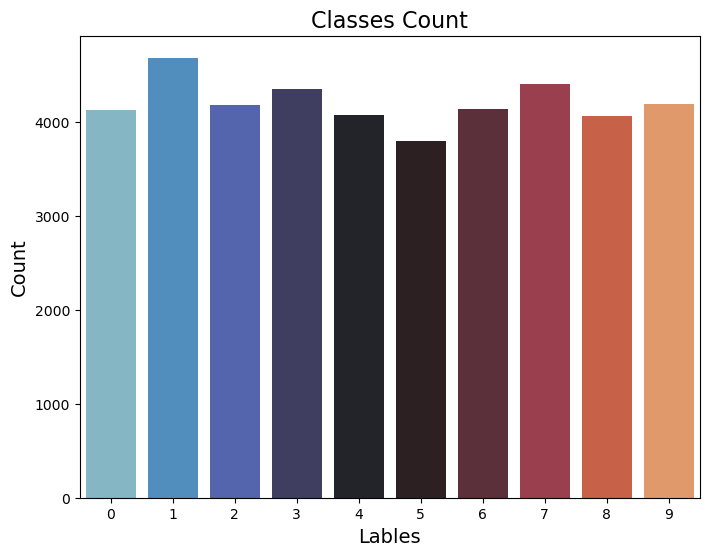

In [46]:
plt.figure(figsize = (8,6))
sns.countplot(data=df , x = df.label , palette="icefire")
plt.title("Classes Count" , size = 16)
plt.xlabel("Lables" , size = 14)
plt.ylabel("Count" , size = 14)
plt.show()

-----------------------------
## Visualizing Some Digits

In [6]:
digits = []
for i in range(10) :
    digit =df[ df['label'] == i].sample().iloc[:,1:].values
    digits.append(digit)

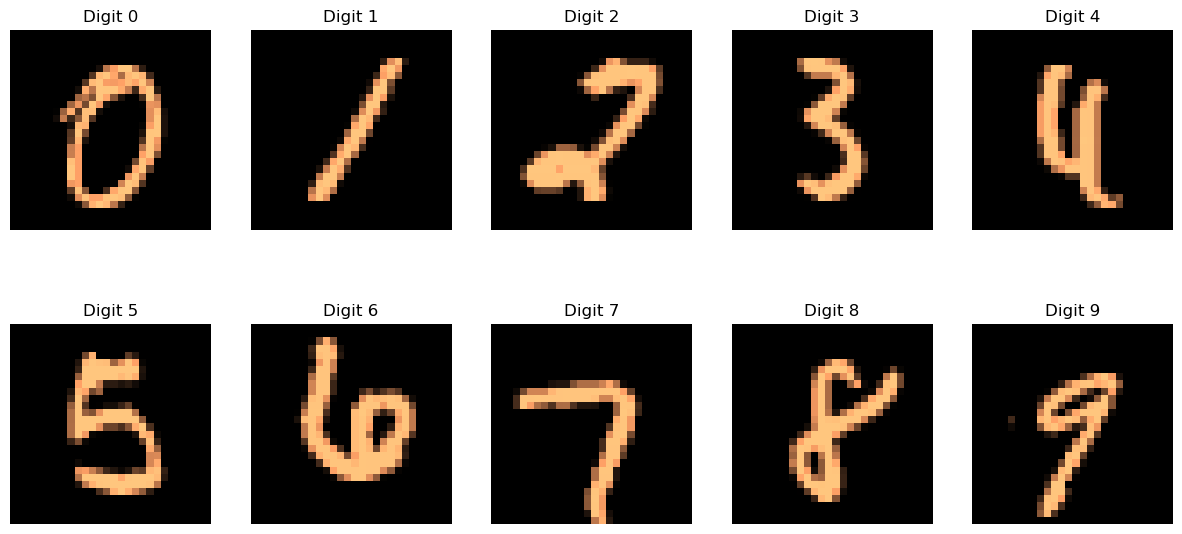

In [7]:
plt.figure(figsize =(15,7))
plt.title("Digits")
for i in range(10):
    digit = np.array(digits[i]).reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.imshow(digit , cmap='copper')
    plt.axis('off')
    plt.title(f"Digit {i}")

-----------------------
## Split Data [Features - Targert]

In [8]:
x = df.iloc[:,1:].values.reshape(-1,28,28,1)
y = df.label

----------------
## Split data [Train - Test]

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2 , random_state=123 , shuffle=True)

------------------------
## Build Neural Network

In [10]:
model = keras.Sequential([

    keras.layers.Rescaling(1/255),
    keras.layers.Flatten(input_shape = (28,28,1)),
    keras.layers.Dense(128  , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(64 , activation = 'relu'),
    keras.layers.Dense(32 , activation = 'relu'),
    keras.layers.Dense(32 , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'softmax')
])



In [11]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = 'adam',
    metrics = 'accuracy'
)

---------------------
## Train The Model

In [12]:
history = model.fit(x_train , y_train , epochs=20)

Epoch 1/20


1050/1050 [==============================] - 8s 5ms/step - loss: 0.3598 - accuracy: 0.8884
Epoch 2/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1498 - accuracy: 0.9546
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1090 - accuracy: 0.9675
Epoch 4/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0911 - accuracy: 0.9731
Epoch 5/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0689 - accuracy: 0.9795
Epoch 6/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0626 - accuracy: 0.9815
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0527 - accuracy: 0.9832
Epoch 8/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 9/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0416 - accuracy: 0.9874
Epoch 10/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0

----------------
## Model Evaluation

In [13]:
model.evaluate(x_test,y_test)

263/263 [==============================] - 1s 3ms/step - loss: 0.1576 - accuracy: 0.9735


[0.15761953592300415, 0.9734523892402649]

In [14]:
y_pred = model.predict(x_test)
y_pred = list(map(lambda x : x.argmax() , y_pred))

263/263 [==============================] - 1s 3ms/step


In [15]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       785
           1       0.98      0.99      0.98       949
           2       0.98      0.96      0.97       838
           3       0.97      0.98      0.97       858
           4       0.97      0.98      0.98       796
           5       0.97      0.97      0.97       800
           6       0.99      0.98      0.99       870
           7       0.95      0.98      0.97       860
           8       0.98      0.96      0.97       817
           9       0.96      0.96      0.96       827

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



### -> As we see , we got 97% accuracy  Using  [ANN] which is a good performance .

--------------
## Build Convolutional Neural Network

In [29]:
cnn_model = keras.Sequential([
    keras.layers.Rescaling(1/255) , 
    
    keras.layers.Conv2D(16 , (2,2), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(32 , (2,2), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)), 
    
    keras.layers.Conv2D(64 ,(2,2), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
#     keras.layers.Conv2D(128 , (3,3), activation = 'relu'),
#     keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

In [30]:
cnn_model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = 'adam',
    metrics = 'accuracy'
)

---------------

In [31]:
cnn_model.fit(x_train , y_train , epochs=20)

Epoch 1/20
1050/1050 [==============================] - 13s 10ms/step - loss: 0.3368 - accuracy: 0.8921
Epoch 2/20
1050/1050 [==============================] - 12s 11ms/step - loss: 0.1043 - accuracy: 0.9664
Epoch 3/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0768 - accuracy: 0.9751
Epoch 4/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0601 - accuracy: 0.9802
Epoch 5/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 6/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0421 - accuracy: 0.9858
Epoch 7/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0372 - accuracy: 0.9876
Epoch 8/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0336 - accuracy: 0.9887
Epoch 9/20
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 10/20
1050/1050 [==============================] - 11s 11m

--------------------
## Evaluate Model 

In [32]:
cnn_model.evaluate(x_test,y_test)

263/263 [==============================] - 2s 5ms/step - loss: 0.0569 - accuracy: 0.9858


[0.05691314488649368, 0.9858333468437195]

In [33]:
y_pred = cnn_model.predict(x_test)
y_pred = list(map(lambda x : x.argmax() , y_pred))

263/263 [==============================] - 1s 5ms/step


In [34]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       785
           1       0.99      0.99      0.99       949
           2       0.98      0.99      0.98       838
           3       0.99      0.98      0.99       858
           4       0.98      0.99      0.99       796
           5       0.99      0.98      0.98       800
           6       0.99      0.99      0.99       870
           7       0.98      0.99      0.98       860
           8       0.99      0.98      0.98       817
           9       0.98      0.97      0.98       827

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



## -> We got 99% accuracy which is better than the result of The Artificial Neural Network